### Import libraries

In [43]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime


## plotly
import plotly.express as px

### Read Dataset

In [44]:
df = pd.read_csv("archive/test.csv")
df.head(3)

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color,price
0,FIAT,124 Spider Lusso,2020.0,30830.0,1.4L I4 16V MPFI SOHC Turbo,1.4,6-Speed Automatic,1.0,Gasoline,Rear-wheel Drive,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,Saddle,Forte Black Metallic,26500
1,Lexus,RX 450h F Sport,2019.0,58274.0,3.5L V6 24V PDI DOHC Hybrid,3.5,Automatic CVT,1.0,Hybrid,Four-wheel Drive,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,Rioja Red,Nightfall Mica,36987
2,Kia,Stinger GT1,2018.0,69303.0,3.3L V6 24V GDI DOHC Twin Turbo,3.3,8-Speed Automatic,1.0,Gasoline,Four-wheel Drive,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,Black,HiChroma Red,26997


In [45]:
df.shape

(4778, 36)

### Check the datatypes of the columns

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4776 entries, 0 to 4777
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        4776 non-null   object 
 1   model                        4776 non-null   object 
 2   year                         4776 non-null   float64
 3   mileage                      4776 non-null   float64
 4   engine                       4770 non-null   object 
 5   engine_size                  4492 non-null   float64
 6   transmission                 4759 non-null   object 
 7   automatic_transmission       4776 non-null   float64
 8   fuel_type                    4776 non-null   object 
 9   drivetrain                   4776 non-null   object 
 10  min_mpg                      4030 non-null   float64
 11  max_mpg                      4030 non-null   float64
 12  damaged                      4722 non-null   float64
 13  first_owner            

### Check number of na cells in each column

In [47]:
# print the percentage of null cells in each column ordered desc 
df.isna().sum().sort_values(ascending=False) / df.shape[0]

max_mpg                        0.156132
min_mpg                        0.156132
interior_color                 0.067183
engine_size                    0.059648
first_owner                    0.018627
exterior_color                 0.012767
personal_using                 0.011930
damaged                        0.011511
transmission                   0.003767
engine                         0.001465
third_row_seating              0.000209
automatic_emergency_braking    0.000209
stability_control              0.000209
leather_seats                  0.000209
memory_seat                    0.000209
brand                          0.000209
apple_car_play/android_auto    0.000209
remote_start                   0.000209
bluetooth                      0.000209
usb_port                       0.000209
heated_seats                   0.000209
sunroof/moonroof               0.000209
navigation_system              0.000209
keyless_start                  0.000209
backup_camera                  0.000209


### Check the recors which has NA model

In [48]:
df[df['model'].isna()] 


,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color,price
3822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Remove the single record which is completely empty

In [49]:
# get the index of empty record then drop it
model_na_index = df[df['model'].isna()].index
df.drop(model_na_index, axis=0, inplace=True)
df.shape

(4777, 36)

### Check why the price column is object not float

In [50]:
df.loc[df['price'].str.match(r'[^\d+]'), 'price']

404     ot Priced
1282    ot Priced
1834    ot Priced
2094    ot Priced
2332    ot Priced
3195    ot Priced
3733    ot Priced
3927    ot Priced
4430    ot Priced
Name: price, dtype: object

### Search for the prices which contains text and replace the text with np.nan

In [51]:
df.loc[df['price'].str.match(r'[^\d+]'), 'price'] = np.nan

In [52]:
df['price'] = pd.to_numeric(df['price'])

In [53]:
df['price'].describe()

count      4768.000000
mean      35815.204069
std       26946.536642
min        1995.000000
25%       20000.000000
50%       29998.000000
75%       42742.500000
max      389900.000000
Name: price, dtype: float64

### Draw histogram for the price

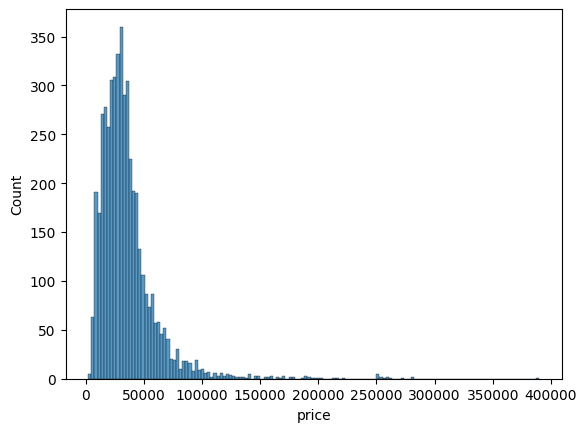

In [54]:
sns.histplot(data=df, x='price')
plt.show()

### Check the numner of records which have price greater than 200000

In [55]:
(df['price']>200000).sum()

19

### Check the unique values of 'year' to make sure it has no incorrect values

In [56]:
df['year'].unique()

array([2020., 2019., 2018., 2023., 2022., 2021., 2013., 2016., 2015.,
       2014., 2012., 2010., 2005., 2017., 2011., 2008., 1984., 1957.,
       2009., 2007., 2006., 1999., 2002., 2004., 2003., 2000., 1993.,
       1991., 1977., 1996., 1987., 2001., 1980., 1992., 1995., 1981.,
       1990., 1986., 1994., 1988., 1970., 1998., 1953., 1972.])

### Draw a diagram to display the count of records for each year

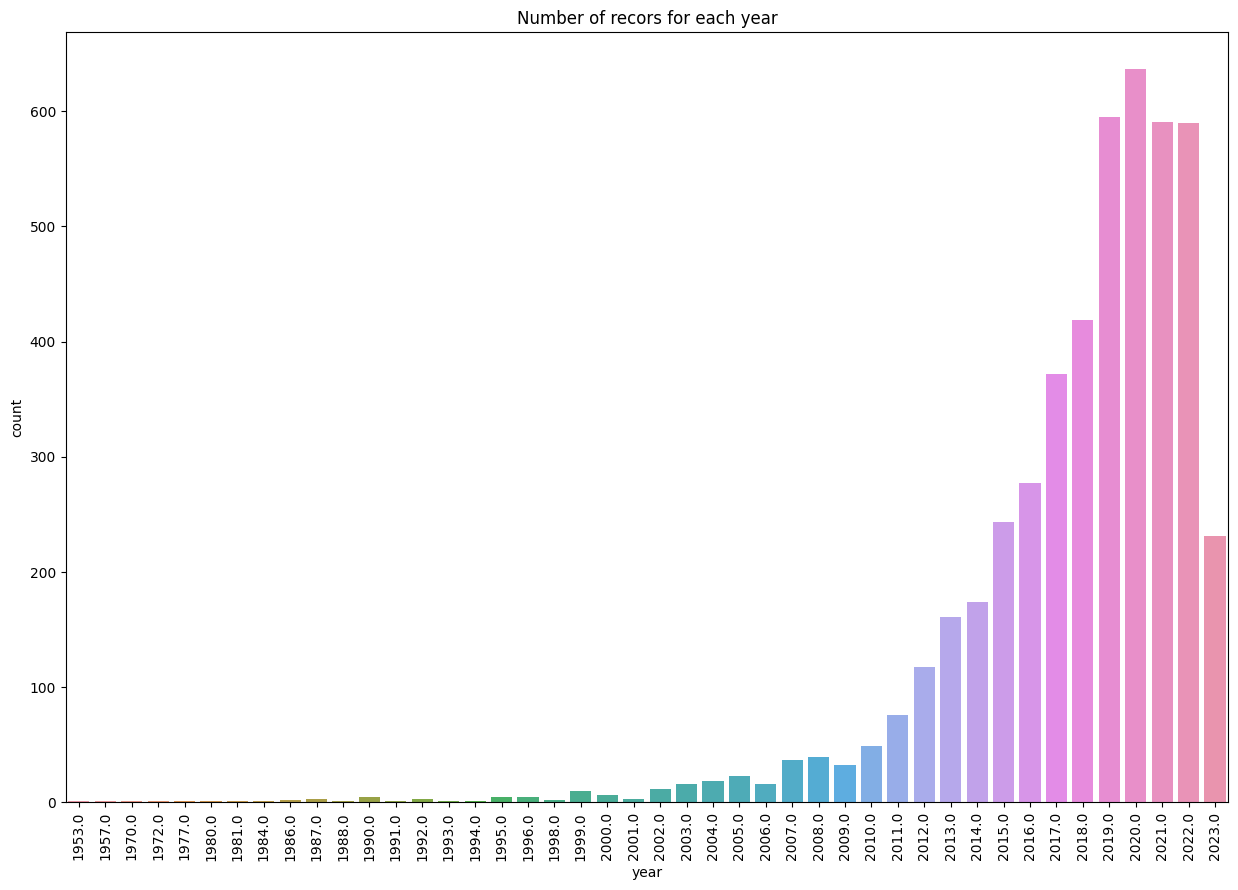

In [57]:
year_df = pd.DataFrame(df['year'].value_counts()) 
year_df.reset_index(inplace=True, names='year') 

plt.figure(figsize=(15,10))
sns.barplot(data=year_df, x='year', y='count')
plt.title('Number of recors for each year')
plt.xticks(rotation=90)
plt.show()

### Print Pivot table to dispaly the number and total-amount of records for each year and brand

In [58]:
df_grouped = pd.DataFrame( df.groupby(by=['year','brand'])['price'].aggregate(['sum','count']) )

df_grouped.reset_index(drop=False, inplace=True )
df_grouped

,year,brand,sum,count
0,1953.0,FIAT,19950.0,1
1,1957.0,Porsche,27990.0,1
2,1970.0,Chevrolet,160000.0,1
3,1972.0,Volkswagen,15900.0,1
4,1977.0,Cadillac,13999.0,1
...,...,...,...,...
472,2023.0,Nissan,676016.0,14
473,2023.0,Porsche,1175470.0,9
474,2023.0,Toyota,452141.0,8
475,2023.0,Volkswagen,111880.0,3


In [59]:
print('The sum of prices for each year and each model')
pivot_data = pd.pivot(data=df_grouped, index='brand', columns='year', values=['sum','count'])
pivot_data['sum']

The sum of prices for each year and each model


year,1953.0,1957.0,1970.0,1972.0,1977.0,1980.0,1981.0,1984.0,1986.0,1987.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
brand,,,,,,,,,,,,,,,,,,,,,
Alfa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,54465.0,216239.0,817019.0,1726489.0,1204052.0,889919.0,975517.0,183355.0
Audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,318594.0,126679.0,320395.0,415489.0,741295.0,1275548.0,1660808.0,1999738.0,1390483.0,690262.0
BMW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,150350.0,244838.0,230177.0,188499.0,467777.0,1124988.0,1596234.0,981097.0,1368481.0,1316160.0
Cadillac,NaN,NaN,NaN,NaN,13999.0,NaN,44999.0,22995.0,NaN,NaN,...,129430.0,195200.0,333581.0,578087.0,393510.0,855884.0,1312631.0,1795079.0,2142930.0,788874.0
Chevrolet,NaN,NaN,160000.0,NaN,NaN,NaN,NaN,NaN,NaN,10995.0,...,168806.0,319632.0,396953.0,574695.0,428214.0,633024.0,683565.0,872798.0,994046.0,387826.0
FIAT,19950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,166858.0,282751.0,523662.0,535291.0,495462.0,339361.0,201093.0,101286.0,24997.0,NaN
Ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101606.0,144130.0,446827.0,576036.0,742790.0,685304.0,1097329.0,1609034.0,1333965.0,139840.0
Honda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63838.0,125196.0,321445.0,225810.0,381824.0,608336.0,592979.0,776594.0,812293.0,470312.0
Hyundai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93686.0,215268.0,182035.0,231312.0,246104.0,450347.0,836588.0,928819.0,1371144.0,610023.0


In [60]:
print('The number of sold cars for each year and each model')
pivot_data['count']

The number of sold cars for each year and each model


year,1953.0,1957.0,1970.0,1972.0,1977.0,1980.0,1981.0,1984.0,1986.0,1987.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
brand,,,,,,,,,,,,,,,,,,,,,
Alfa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,8.0,27.0,58.0,37.0,26.0,22.0,4.0
Audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,5.0,13.0,12.0,19.0,29.0,37.0,32.0,27.0,9.0
BMW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,10.0,6.0,7.0,14.0,24.0,32.0,18.0,22.0,15.0
Cadillac,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,...,7.0,9.0,11.0,15.0,10.0,23.0,28.0,29.0,29.0,9.0
Chevrolet,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,7.0,15.0,12.0,19.0,13.0,18.0,17.0,18.0,20.0,5.0
FIAT,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,26.0,39.0,31.0,25.0,16.0,8.0,4.0,1.0,NaN
Ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,7.0,13.0,22.0,24.0,19.0,29.0,36.0,26.0,3.0
Honda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,7.0,16.0,11.0,16.0,22.0,19.0,25.0,23.0,11.0
Hyundai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,14.0,11.0,14.0,13.0,21.0,30.0,32.0,39.0,16.0


### Heatmap to dispaly the the number and total-amount of records for each year and brand

Text(0.5, 1.0, 'Total price of sold-cars')

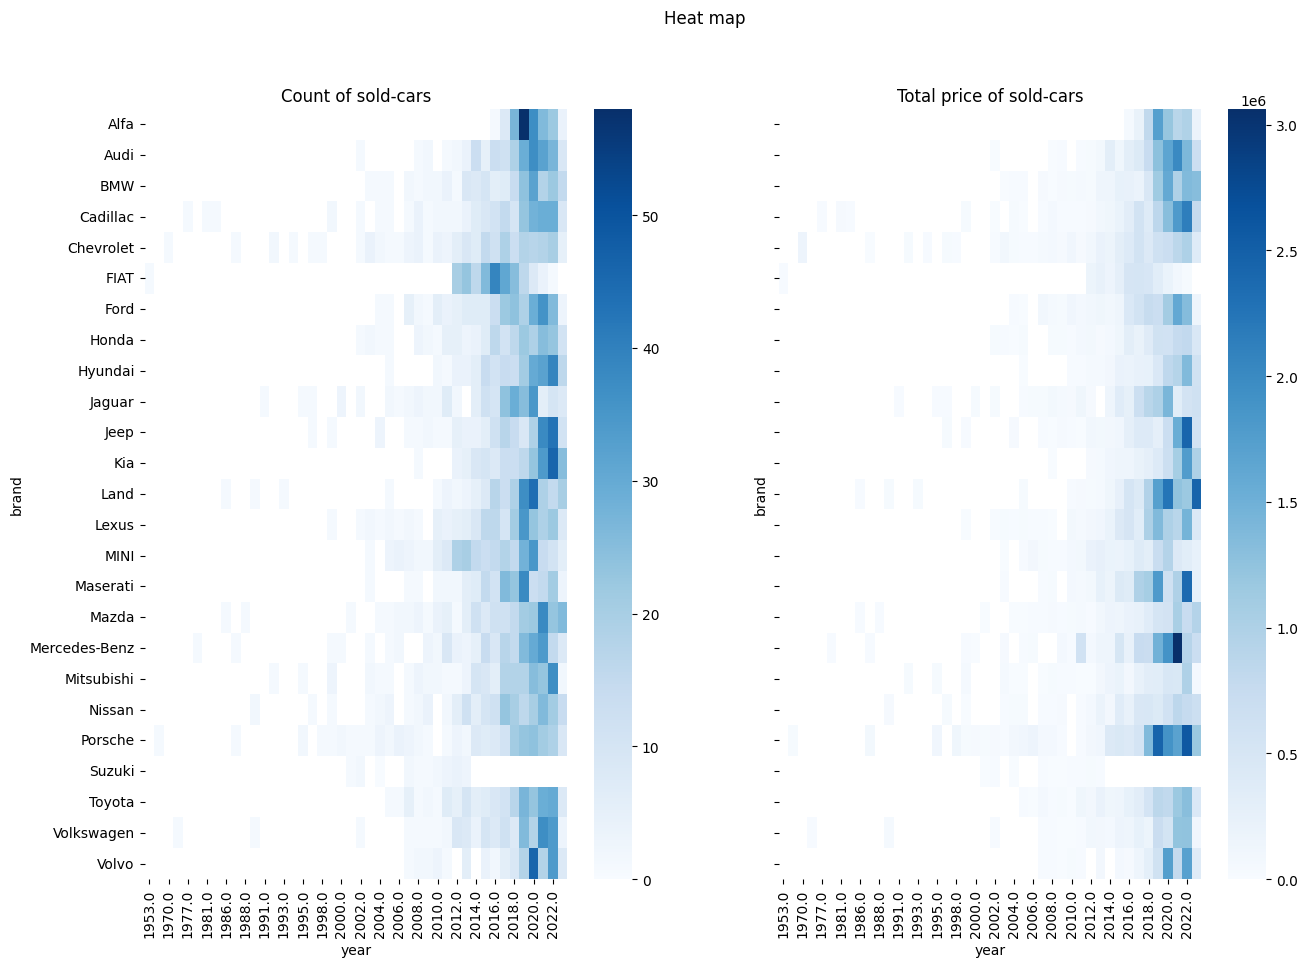

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Heat map ')

sns.heatmap(ax=axes[0], data=pivot_data['count'], cmap="Blues")
axes[0].set_title('Count of sold-cars')

sns.heatmap(ax=axes[1], data=pivot_data['sum'], cmap="Blues")
axes[1].set_title('Total price of sold-cars')
                

### Print the total count of cars sold over the years for each brand orderd desc by brand

In [62]:
print('count of cars sold over the years for each brand')
pivot_data['count'].sum(axis=1).sort_values(ascending=False)

count of cars sold over the years for each brand


brand
MINI             238.0
Mazda            218.0
Ford             218.0
Land             210.0
Lexus            210.0
FIAT             210.0
Hyundai          208.0
Kia              207.0
Audi             207.0
Nissan           205.0
Mercedes-Benz    202.0
Toyota           200.0
Jaguar           194.0
Cadillac         194.0
Jeep             193.0
Chevrolet        190.0
Mitsubishi       188.0
Maserati         187.0
Volkswagen       186.0
Porsche          183.0
Alfa             183.0
BMW              180.0
Honda            178.0
Volvo            160.0
Suzuki            19.0
dtype: float64

### Print the total count of cars sold for each year orderd desc by year

In [63]:
print('count of cars sold for each year')
pivot_data['count'].sum(axis=0).sort_values(ascending=False)

count of cars sold for each year


year
2020.0    637.0
2019.0    593.0
2021.0    591.0
2022.0    590.0
2018.0    418.0
2017.0    370.0
2016.0    277.0
2015.0    242.0
2023.0    231.0
2014.0    174.0
2013.0    160.0
2012.0    117.0
2011.0     76.0
2010.0     49.0
2008.0     39.0
2007.0     36.0
2009.0     32.0
2005.0     23.0
2004.0     17.0
2003.0     16.0
2006.0     16.0
2002.0     11.0
1999.0     10.0
2000.0      6.0
1990.0      4.0
1996.0      4.0
1995.0      4.0
1992.0      3.0
2001.0      3.0
1987.0      3.0
1998.0      2.0
1986.0      2.0
1981.0      1.0
1970.0      1.0
1972.0      1.0
1977.0      1.0
1980.0      1.0
1957.0      1.0
1984.0      1.0
1988.0      1.0
1991.0      1.0
1993.0      1.0
1994.0      1.0
1953.0      1.0
dtype: float64

### Print brands which sold greatest number of cars in 2021

In [64]:
print('brands which sold greatest number of cars in 2021')
max_cars_sold_in_2021 = pivot_data['count'][2021].max(axis=0)
pivot_data['count'][pivot_data['count'][2021] == max_cars_sold_in_2021].index.tolist()

brands which sold greatest number of cars in 2021


['Jeep', 'Mazda']

### Print brands which sold greatest number of cars for each year

In [65]:
print('brands which sold greatest number of cars in each year')

max_cars_sold_per_year = pivot_data['count'].max(axis=0) 

print('max-cars-sold', '\t', 'year', '\t\t', 'brands') 
for year, max_per_year in max_cars_sold_per_year.sort_values(ascending=False).items():
    
    max_brand = pivot_data['count'][pivot_data['count'][year] == max_per_year].index.tolist()
    print(max_per_year, '\t\t', year, '\t',  max_brand)


brands which sold greatest number of cars in each year
max-cars-sold 	 year 		 brands
58.0 		 2019.0 	 ['Alfa']
46.0 		 2022.0 	 ['Kia']
46.0 		 2020.0 	 ['Volvo']
39.0 		 2016.0 	 ['FIAT']
38.0 		 2021.0 	 ['Jeep', 'Mazda']
31.0 		 2017.0 	 ['FIAT']
29.0 		 2018.0 	 ['Jaguar']
26.0 		 2023.0 	 ['Mazda']
26.0 		 2015.0 	 ['FIAT']
23.0 		 2013.0 	 ['FIAT']
20.0 		 2012.0 	 ['FIAT']
16.0 		 2014.0 	 ['FIAT']
9.0 		 2011.0 	 ['Mercedes-Benz']
6.0 		 2010.0 	 ['Ford', 'MINI']
5.0 		 2007.0 	 ['Ford', 'Toyota']
4.0 		 2003.0 	 ['Chevrolet']
4.0 		 2009.0 	 ['Nissan']
4.0 		 2008.0 	 ['Cadillac', 'Chevrolet']
4.0 		 2006.0 	 ['MINI', 'Porsche']
3.0 		 1999.0 	 ['Mitsubishi']
3.0 		 2000.0 	 ['Jaguar']
3.0 		 2005.0 	 ['MINI', 'Nissan']
3.0 		 2004.0 	 ['Jeep', 'Porsche']
2.0 		 2002.0 	 ['Jaguar', 'Suzuki']
2.0 		 1995.0 	 ['Porsche']
2.0 		 1992.0 	 ['Chevrolet']
2.0 		 1990.0 	 ['Nissan']
1.0 		 1957.0 	 ['Porsche']
1.0 		 1986.0 	 ['Land', 'Mazda']
1.0 		 1970.0 	 ['Chevrolet']
1.0 		 197

### Print the (average, 0.25 percentile, 0.75 percentile) milages per year of all cars

In [66]:
print('what are the (average, 0.25 percentile, 0.75 percentile) milages per year of all cars?')
df['mileage_per_year'] = df['mileage'] / (datetime.today().year - df['year'] + 1) 
df['mileage_per_year'].describe()

what are the (average, 0.25 percentile, 0.75 percentile) milages per year of all cars?


count     4777.000000
mean      8148.324626
std       4600.351264
min          0.000000
25%       4870.750000
50%       7558.500000
75%      10687.000000
max      51482.600000
Name: mileage_per_year, dtype: float64

### Draw Countplot for engine_size

draw countplot for enigne size


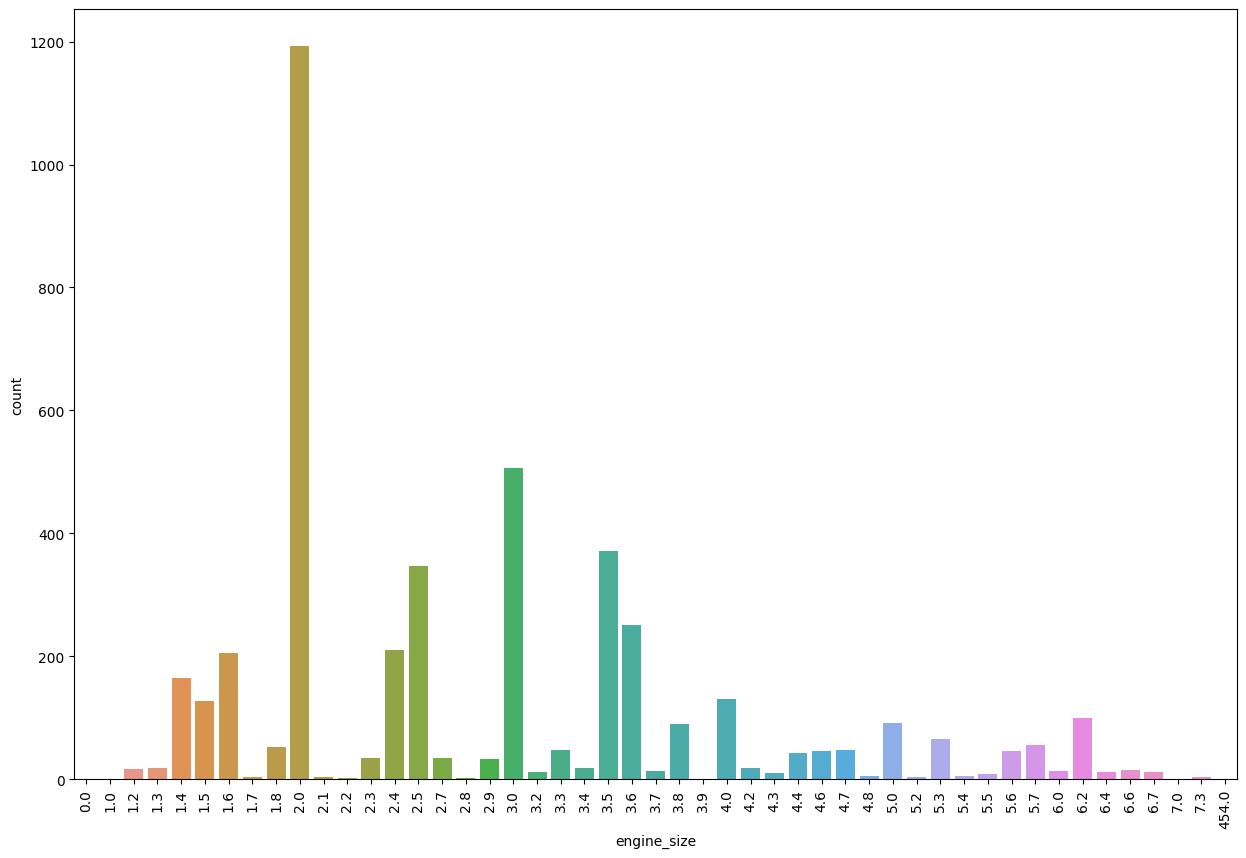

In [67]:
print("draw countplot for enigne size")

plt.figure(figsize=(15,10))
sns.countplot(data=df, x='engine_size')
plt.xticks(rotation=90)
plt.show()

### Check the number of records with engine_size = 454 and drop them as they are considered outliers

In [68]:
df[df['engine_size'] >= 454]

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color,price,mileage_per_year
3971,Chevrolet,Chevelle SS,1970.0,4908.0,454,454.0,Automatic,1.0,Unknown,Rear-wheel Drive,...,0.0,0.0,0.0,0.0,0.0,0.0,GREEN,MIST GREEN,160000.0,90.888889


In [69]:
print('drop single record with engine_size 454')
index_engine_size_454 = df[df['engine_size'] >= 454].index
df.drop(index=index_engine_size_454, inplace=True)

drop single record with engine_size 454


### Print the most-popluar engine_size

In [70]:
def get_most_occurred_values(df, column_name, no_of_values):
    column_count = pd.DataFrame(df[column_name].value_counts())
    column_count.rename(columns = {column_name:'count'}, inplace = True)
    column_count.reset_index(inplace=True, names='value')
    result_df = pd.DataFrame()
    result_df['value'] = column_count.loc[0:no_of_values-1,'value']
    result_df['count'] = column_count.loc[0:no_of_values-1,'count']
    return result_df

In [71]:
most_occurred_value = get_most_occurred_values(df, 'engine_size', 1)
print(f'Most used engine_size is {most_occurred_value.loc[0,"value"]} with total count {most_occurred_value.loc[0,"count"]}')

Most used engine_size is 2.0 with total count 1193


### Print the most-used type of fuel

In [72]:
most_occurred_value = get_most_occurred_values(df, 'fuel_type', 1)
print(f'Most used fuel_type is {most_occurred_value.loc[0,"value"]} with total count {most_occurred_value.loc[0,"count"]}')

Most used fuel_type is Gasoline with total count 4327


### Draw histogram to compare the minmum and maximum fuel efficiency

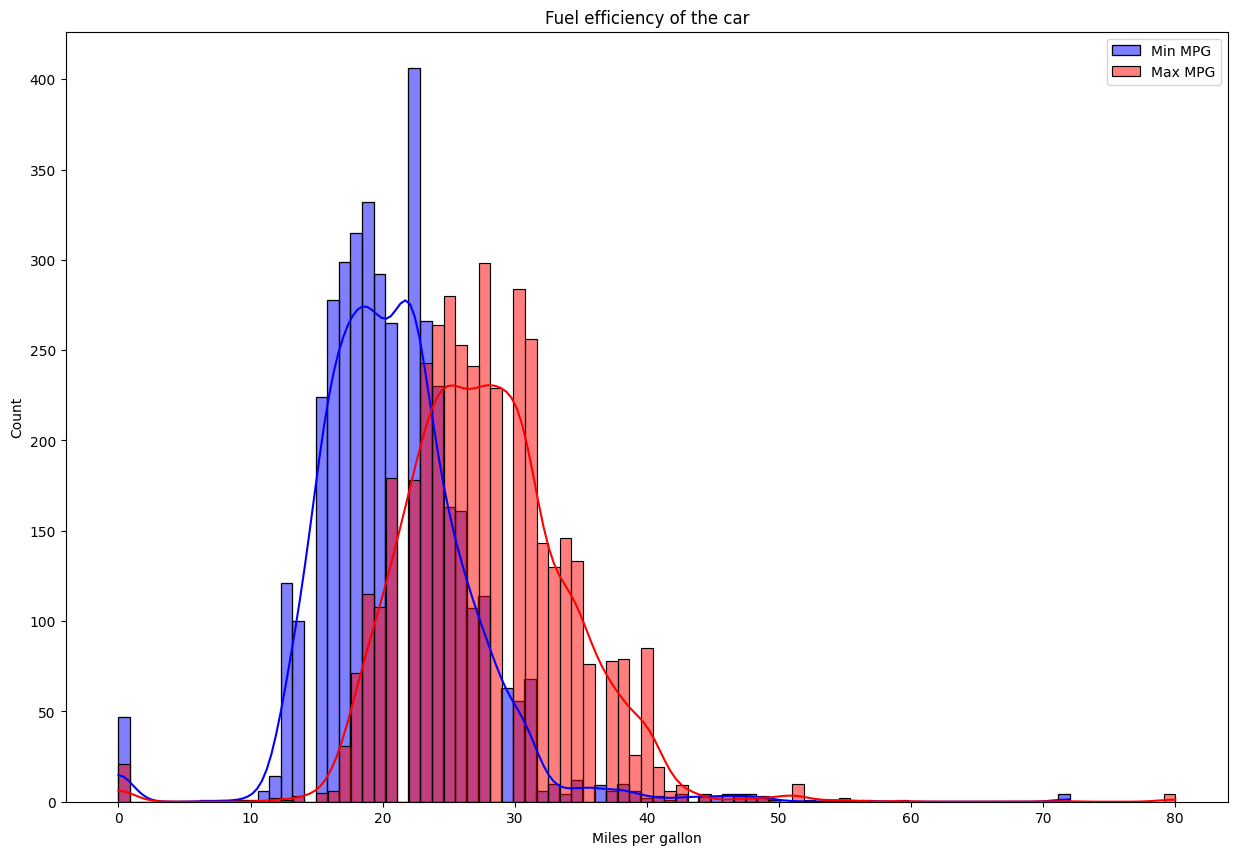

In [73]:
plt.figure(figsize=(15,10))
sns.histplot(data=df, x='min_mpg', color="blue", label="Min MPG", kde=True )
sns.histplot(data=df, x='max_mpg',  color="red", label="Max MPG", kde=True)
plt.legend()
plt.xlabel('Miles per gallon')
plt.title('Fuel efficiency of the car')
plt.show()

### Proof that cars with automatic_emergency_braking are less damaged than those cars without this option

In [74]:
automatic_emergency_braking_data = pd.DataFrame( df.groupby('automatic_emergency_braking')['damaged'].sum() )
sum_damaged_cars = automatic_emergency_braking_data['damaged'].sum(axis=0)
without_option_percentage = automatic_emergency_braking_data['damaged'].loc[0] / sum_damaged_cars
with_option_percentage = automatic_emergency_braking_data['damaged'].loc[1] / sum_damaged_cars
print(f'Percentage of cars that are damaged and does not have the option "automatic_emergency_braking" is {without_option_percentage:0.2f}')
print(f'Percentage of cars that are damaged and have the option "automatic_emergency_braking" is {with_option_percentage:0.2f}')


Percentage of cars that are damaged and does not have the option "automatic_emergency_braking" is 0.83
Percentage of cars that are damaged and have the option "automatic_emergency_braking" is 0.17


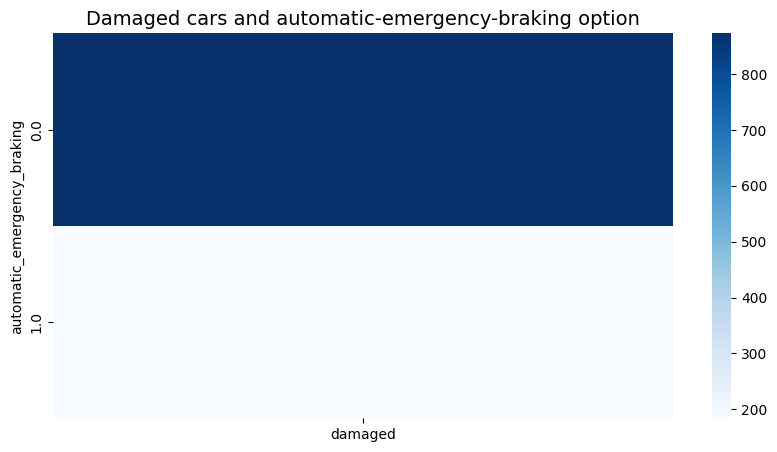

In [75]:
plt.figure(figsize=(10,5))
sns.heatmap(automatic_emergency_braking_data, cmap="Blues") 
plt.title('Damaged cars and automatic-emergency-braking option', c='Black', fontsize=14)
plt.show()

### Draw countplot diagram for each column which has two values (1, 0) in one diagram to compare them

In [76]:
def get_columns_names_by_no_of_values(df, number_of_unique_values):
    result = np.array([])
    for column_name in df.columns:
        no_unique_values = df[column_name].nunique()
        if no_unique_values == 2:
            result = np.append(result, column_name)
    return result

In [77]:
def reshape_and_expand_array(arr, no_of_rows):
    # if the array can not be divided by param 'first_dimention' then reshape will raise error
    # expand the array with nan values to be able to reshape it
    if arr.shape[0] % no_of_rows > 0:
        no_of_needed_cells = no_of_rows - arr.shape[0] % no_of_rows

        empty_array = np.empty((no_of_needed_cells),dtype=np.string_)
        empty_array[:] = ''
        arr = np.append(arr, empty_array)
 
    return arr.reshape((no_of_rows, arr.shape[0] // no_of_rows))

In [78]:
def init_sub_plots(column_names_array, width, height):
    no_rows = len(column_names_array)
    no_columns = 0 if len(column_names_array) == 0 else  len(column_names_array[0])
 
    fig, axes = plt.subplots(no_rows, no_columns, figsize=(width, height), sharey=True)
    fig.suptitle('Diagram for all variables which contains two values')
    return (fig, axes)

In [79]:
def draw_countplots_for_columns(df, column_names_array, no_of_rows):
    column_names_array = reshape_and_expand_array(column_names_array, no_of_rows) 
 
    (fig, axes) = init_sub_plots(column_names_array, 15, 30) 
    
    for i in range(len(column_names_array)):
        for j in range(len(column_names_array[i])):
            if column_names_array[i,j] != '': 
                sns.countplot(ax=axes[i,j], data=df, x=column_names_array[i,j])
                axes[i,j].set_title(column_names_array[i,j])

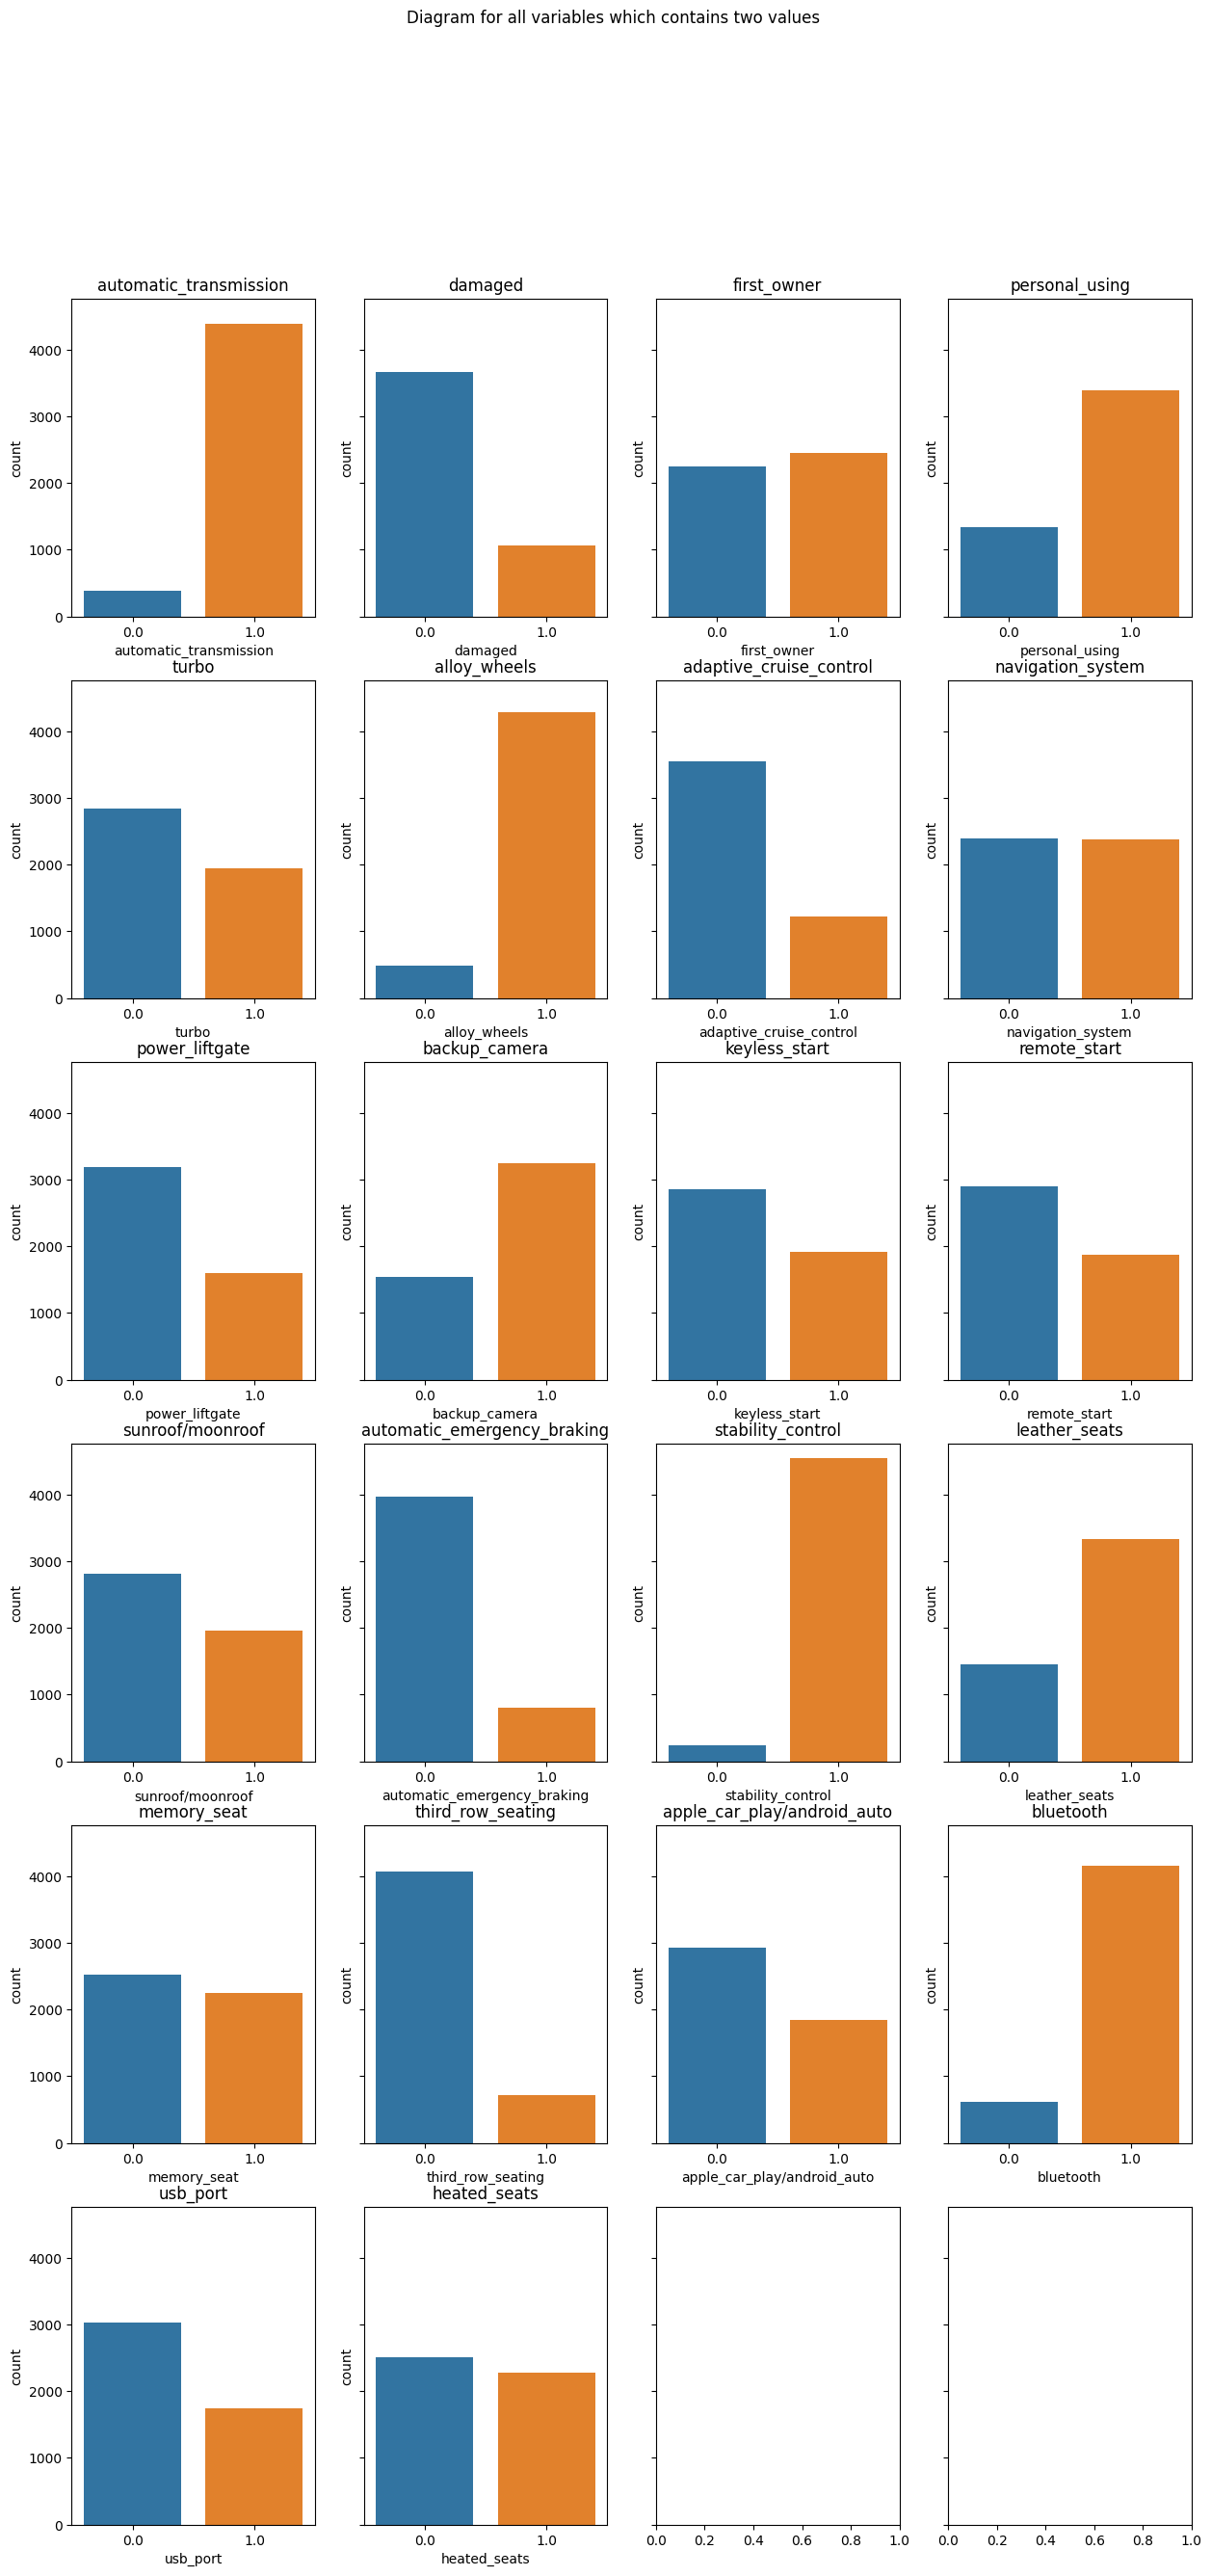

In [80]:
columns_of_2_unique_values = get_columns_names_by_no_of_values(df, 2) 
draw_countplots_for_columns(df, columns_of_2_unique_values, 6)

### Select the most used colors for interior design

In [81]:
most_occurred_values_interior_design = get_most_occurred_values(df, 'interior_color', 20)
most_occurred_values_interior_design.loc[most_occurred_values_interior_design['count'] > 20, :]
 

,value,count
0,Black,1826
1,Gray,221
2,Ebony,179
3,Charcoal,158
4,Jet Black,154
5,Carbon Black,115
6,Beige,100
7,Titan Black,95
8,Nero,87
9,Tan,63


### Select the most used colors for exterior design

In [82]:
most_occurred_values_exterior_design = get_most_occurred_values(df, 'exterior_color', 20)
most_occurred_values_exterior_design.loc[most_occurred_values_exterior_design['count'] > 20, :]
 

,value,count
0,Black,324
1,White,267
2,Gray,159
3,Silver,136
4,Blue,103
5,Fuji White,66
6,Red,65
7,Santorini Black,53
8,Bright White Clearcoat,44
9,Black Raven,42


### Draw diagram to compare the colors used in interior and exterior design

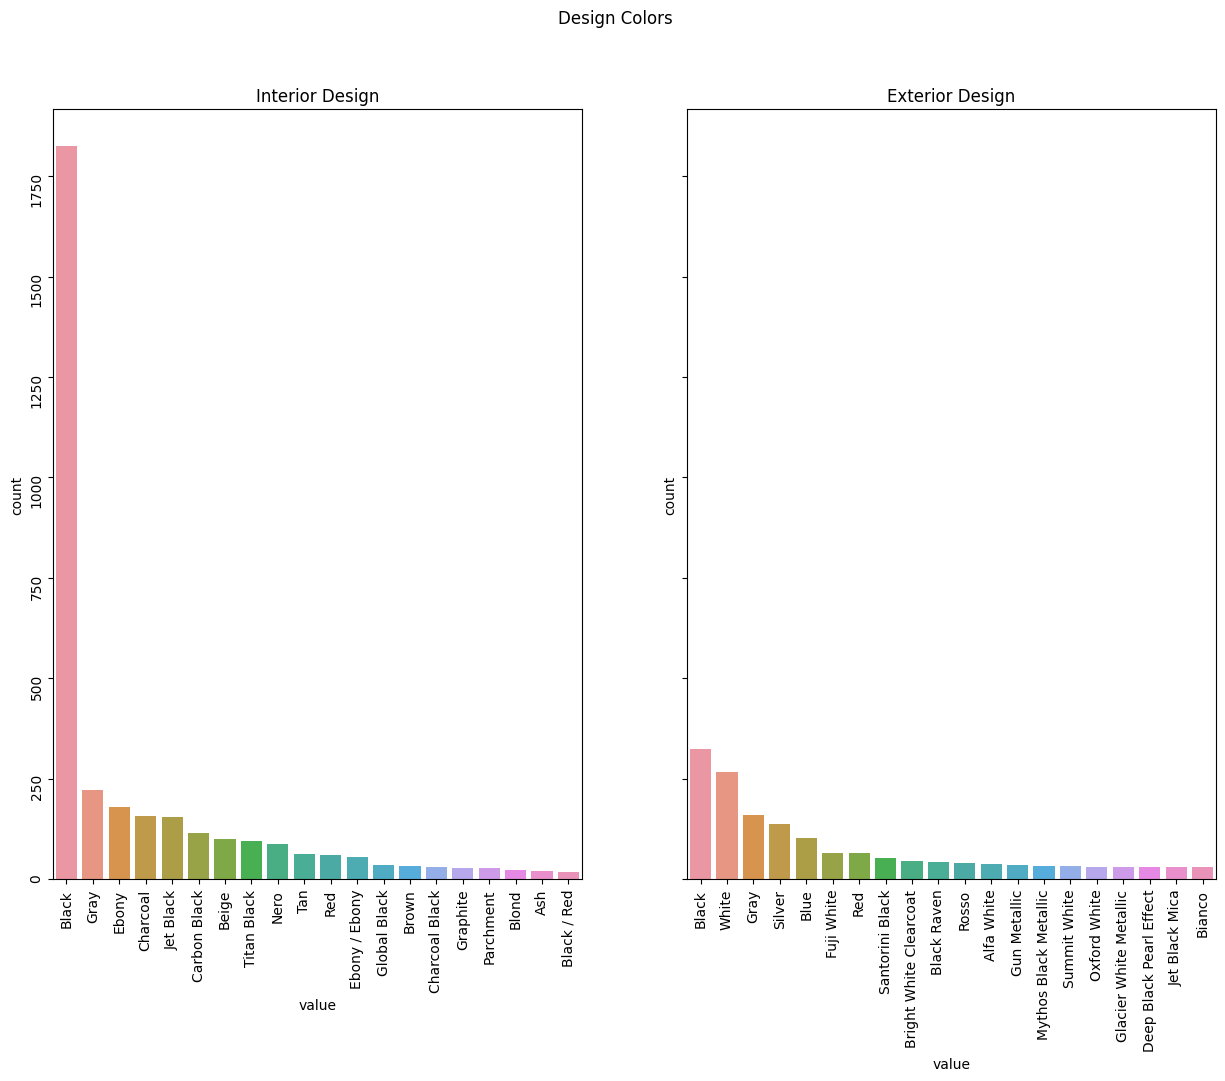

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Design Colors')
 
 
sns.barplot(ax=axes[0], data=most_occurred_values_interior_design, x='value', y='count' )
axes[0].set_title('Interior Design')
axes[0].tick_params(labelrotation=90)
 
sns.barplot(ax=axes[1], data=most_occurred_values_exterior_design, x='value', y='count')
axes[1].set_title('Exterior Design')
axes[1].tick_params(labelrotation=90)
 
plt.show()

### Select numerical-continuous fields and check the outliers

In [ ]:
columns_of_2_unique_values = get_columns_names_by_no_of_values(df, 2) 
float_columns = df.select_dtypes(include=[float]).columns.tolist() 
numerical_continous_columns = np.setdiff1d(float_columns, columns_of_2_unique_values)
df[numerical_continous_columns].describe()

,engine_size,max_mpg,mileage,mileage_per_year,min_mpg,price,year
count,4492.000000,4030.000000,4776.000000,4776.000000,4030.000000,4767.000000,4776.000000
mean,2.904853,27.841935,48907.615159,8150.011694,20.860298,35789.153136,2017.746022
std,1.217015,6.369181,37266.208995,4599.354815,5.878735,26889.248836,4.841594
min,0.000000,0.000000,0.000000,0.000000,0.000000,1995.000000,1953.000000
25%,2.000000,24.000000,20114.500000,4872.500000,17.000000,20000.000000,2016.000000
50%,2.500000,28.000000,40994.000000,7560.650000,20.000000,29998.000000,2019.000000
75%,3.500000,31.000000,69707.000000,10688.500000,24.000000,42732.500000,2021.000000
max,7.300000,80.000000,288996.000000,51482.600000,72.000000,389900.000000,2023.000000


In [ ]:
def draw_boxplots_for_columns(df, column_names_array, no_of_rows):
    column_names_array = reshape_and_expand_array(column_names_array, no_of_rows) 
    (fig, axes) = init_sub_plots(column_names_array, 15, 35) 
    
     
    for i in range(len(column_names_array)):
        for j in range(len(column_names_array[i])):
            if column_names_array[i,j] != '':   
                # if number of columns > 1 then use 2-d indexing else 1-d indexing              
                if len(column_names_array[i]) > 1:
                    ax = axes[i, j]
                else:
                    ax = axes[i]
                sns.boxplot(ax=ax, data=df, x=column_names_array[i,j])
                ax.set_title(column_names_array[i,j])
    

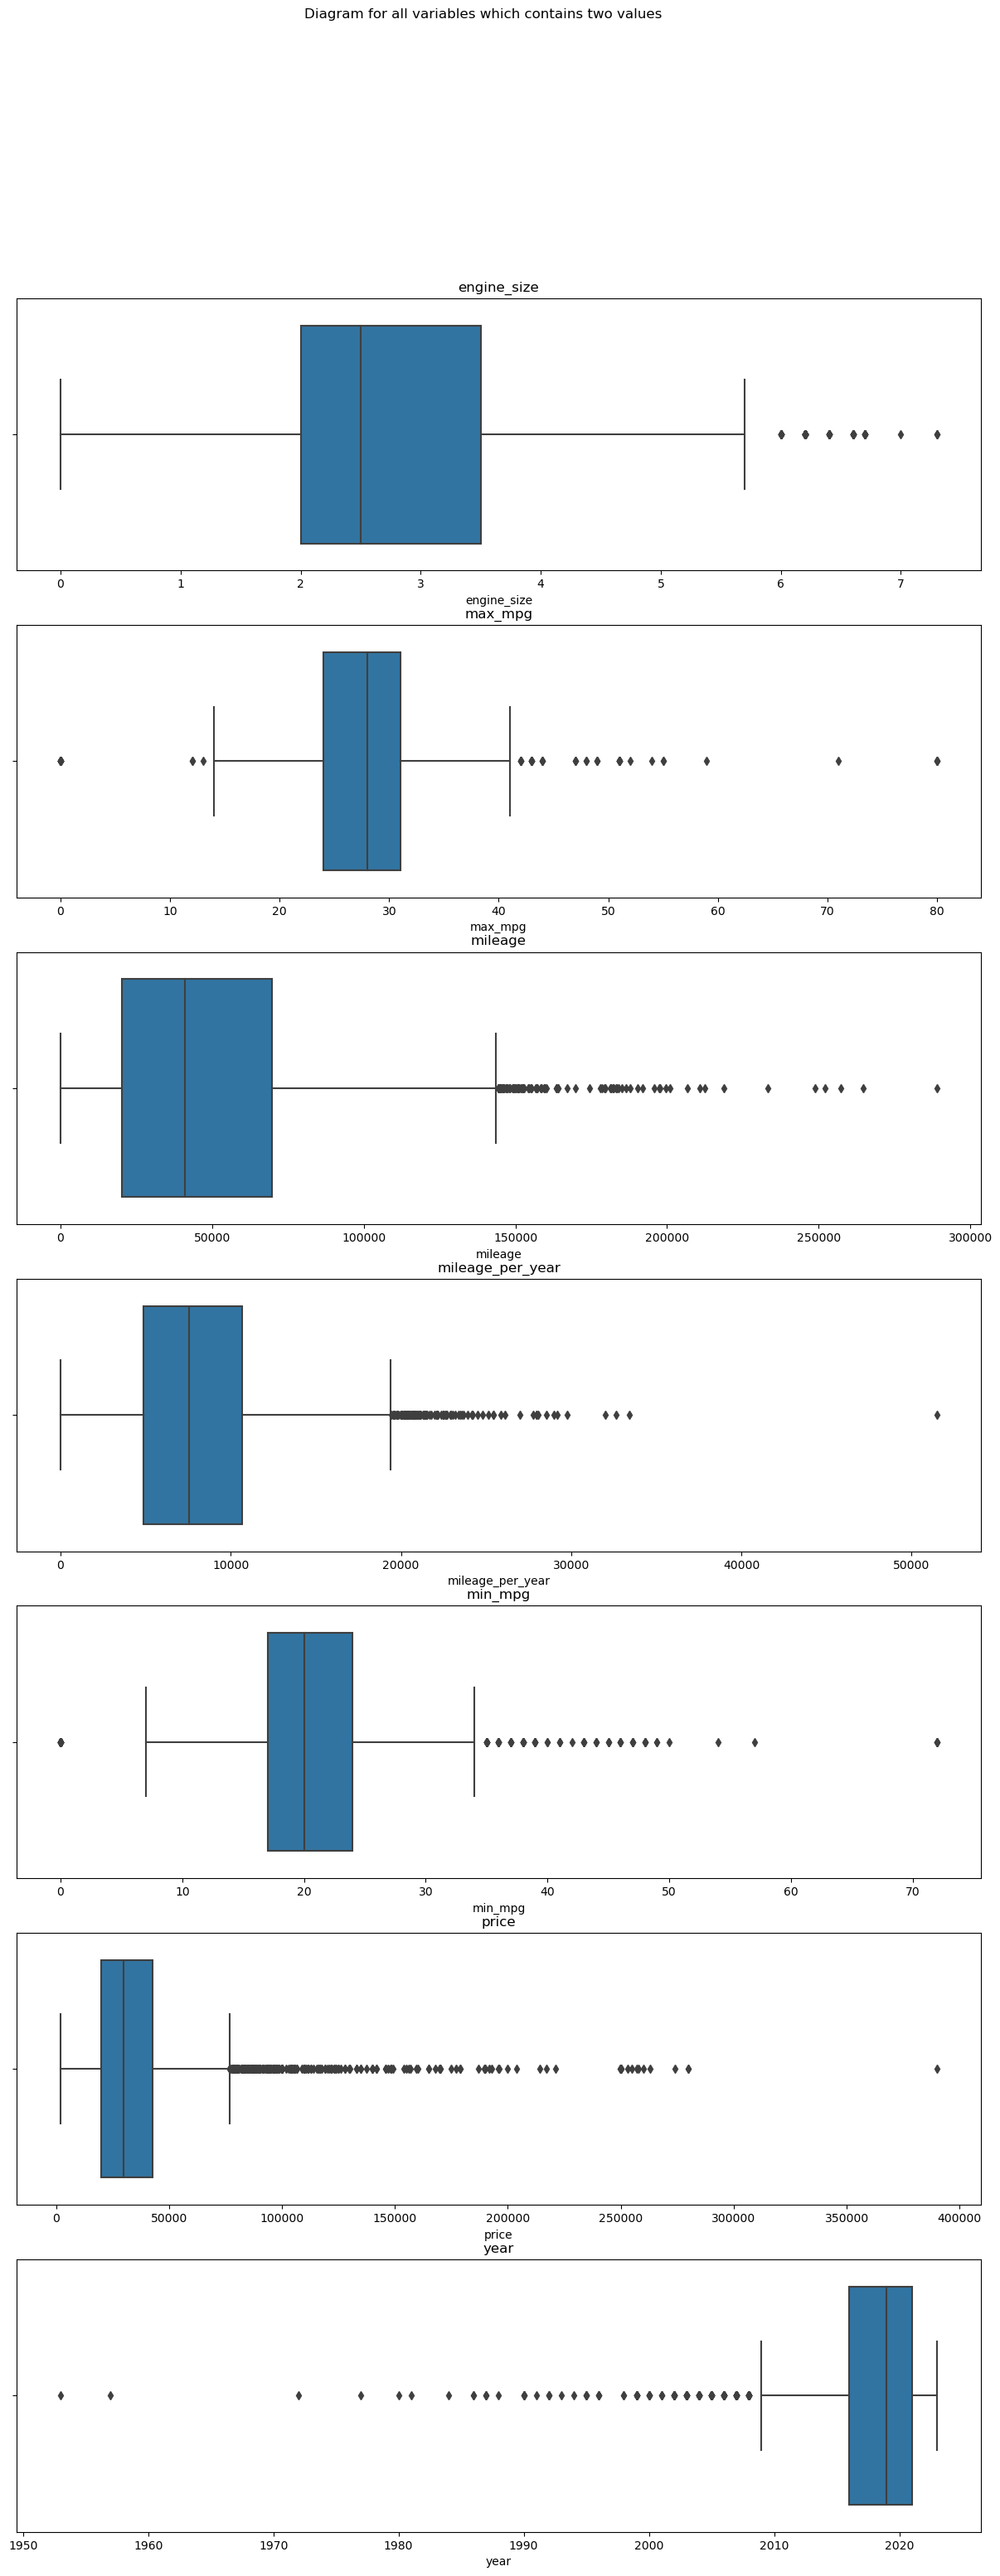

In [ ]:
draw_boxplots_for_columns(df[numerical_continous_columns], numerical_continous_columns, len(numerical_continous_columns))

### Draw Histograms for price, each histogram shows the effect of one field (which has 2-values) on the price

In [ ]:
def draw_histplots_for_price_with_columns(df, column_names_array, no_of_rows):
    column_names_array = reshape_and_expand_array(column_names_array, no_of_rows) 
 
    (fig, axes) = init_sub_plots(column_names_array, 15, 30) 
    
    for i in range(len(column_names_array)):
        for j in range(len(column_names_array[i])):
            if column_names_array[i,j] != '': 
                sns.histplot(ax=axes[i,j], data=df, x='price', hue=column_names_array[i,j], palette={0:'Red', 1:'Blue'})
                axes[i,j].set_title(column_names_array[i,j])

In [ ]:
df[df['price'] > 150000].shape

(44, 37)

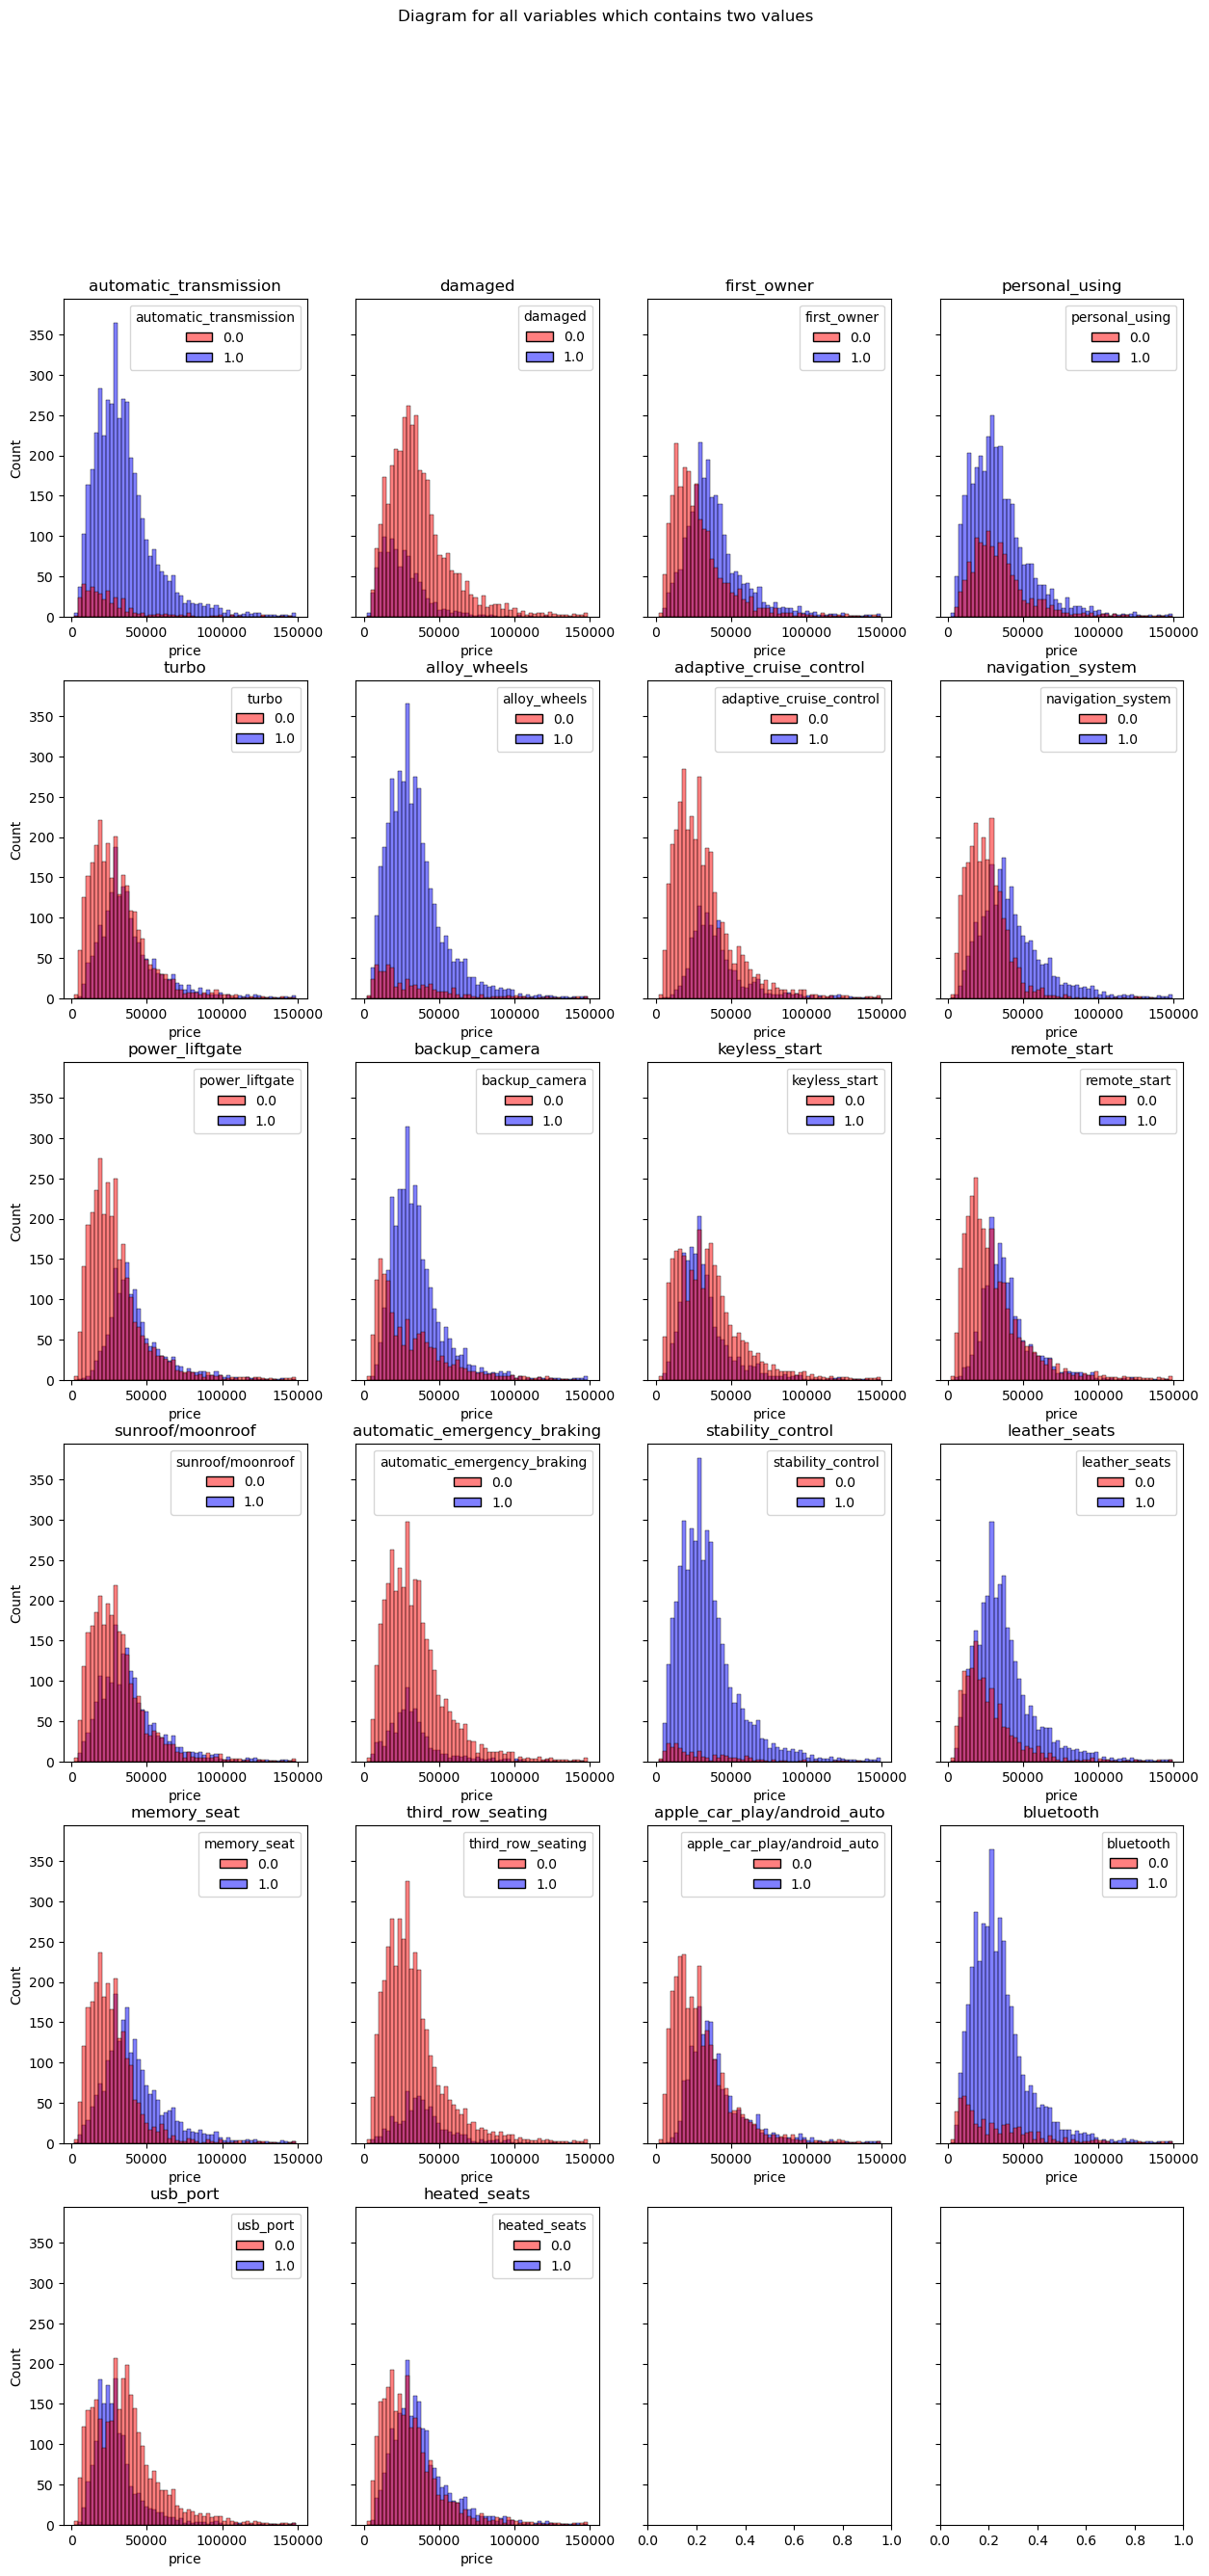

In [ ]:
# number of records whose price more than 150K is 44
# we will exclude these record to be able to compare the price with other columns easily
df_price_filtered = df[df['price'] <= 150000]
columns_of_2_unique_values = get_columns_names_by_no_of_values(df_price_filtered, 2) 
draw_histplots_for_price_with_columns(df_price_filtered, columns_of_2_unique_values, 6)

##### Based on the previous figure:

1- The following factors will reduce the price of the car:
- damaged

2- The following factors will increase the price of the car:
- automatic_transmission
- alloy_wheels
- adaptive_cruise_control
- navigation_system
- stability_control
- leather_seats
- blutooth

3- The cars that have the following features are sold more than others:
- personal_using
- backup_camera

### Draw heatmap for the correlation among float64 fields

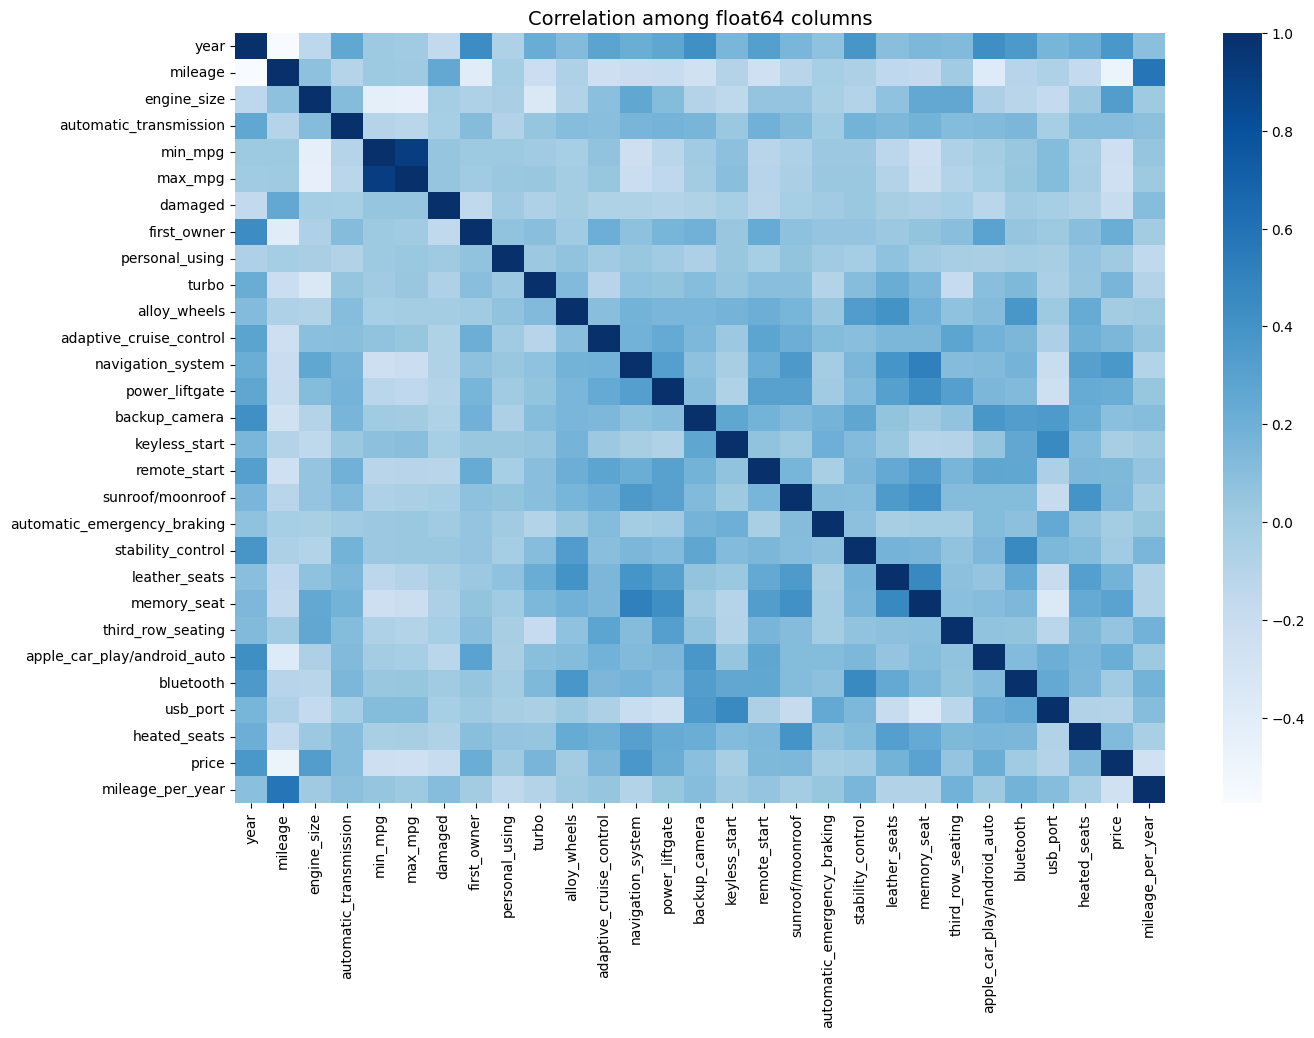

In [97]:
data_types = df.select_dtypes(include='float64').columns.tolist()
corr_data = df[data_types].corr()

plt.figure(figsize=(15 ,10))
sns.heatmap(corr_data, cmap="Blues", annot=False) 
plt.title('Correlation among float64 columns', c='Black', fontsize=14)
plt.show()

### Print fields which have correlation greater then 0.4 and less than 1 to 

In [129]:
corr_data = corr_data[abs(corr_data[:]) > 0.4]

most_correlated = pd.DataFrame(columns = ['field1', 'field2', 'correlation'])

for index in corr_data.index:
    for col in corr_data.columns:
        if np.isnan(corr_data.loc[index,col]) == False and corr_data.loc[index,col] != 1:
            row_to_append = pd.DataFrame([{'field1' : index, 'field2' : col, 'correlation' : corr_data.loc[index,col]}])
            most_correlated = pd.concat([most_correlated, row_to_append])
most_correlated.sort_values(by='correlation', ascending=False)

,field1,field2,correlation
0,min_mpg,max_mpg,0.908889
0,max_mpg,min_mpg,0.908889
0,mileage_per_year,mileage,0.580165
0,mileage,mileage_per_year,0.580165
0,navigation_system,memory_seat,0.518335
0,memory_seat,navigation_system,0.518335
0,memory_seat,leather_seats,0.464386
0,leather_seats,memory_seat,0.464386
0,usb_port,keyless_start,0.454497
0,keyless_start,usb_port,0.454497


In [ ]:
add column to represent the number of features in each car and this relation with the price

SyntaxError: invalid syntax (2327053045.py, line 1)

In [ ]:
is there a relation between the color and the damage?
is there a relation between the brand/model/year/milage and the damage?

: 

In [ ]:
## plotly
#px.scatter_matrix(df)

: 